In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager

def metaGraph():
    plt.yticks([0,2,4,6,8,10,12,14,16,18,])
    plt.ylabel("Humps", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.xlabel("Neighborhood", fontweight="bold", fontname="PT Serif", fontsize=13)
    plt.title("Humps per Hood in Pittsburgh, PA", fontweight="bold", fontname="PT Serif", fontsize=15)

matplotlib.font_manager.findSystemFonts(fontpaths="/data/fonts/", fontext='ttf')

humps = pd.read_csv("data/speedhumps.csv")

humps.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [2]:
hph = {}  # My custom metric of Humps Per Hood
hoods = []
nums = []

for index, row in humps.iterrows():
    hood = row["neighborhood"]
    if hood in hph:
        hph[hood] += 1
    else:
        hph[hood] = 1

for i in hph:
    hoods.append(i)
    nums.append(hph[i])

hph = {"Neighborhood":hoods, "Humps":nums}

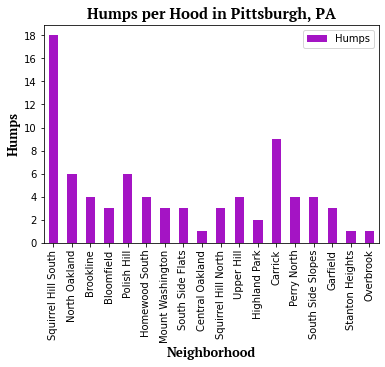

In [3]:
graphHumps = pd.DataFrame.from_dict(hph)

graphHumps.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

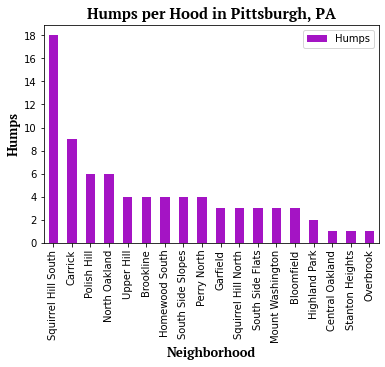

In [4]:
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
metaGraph()

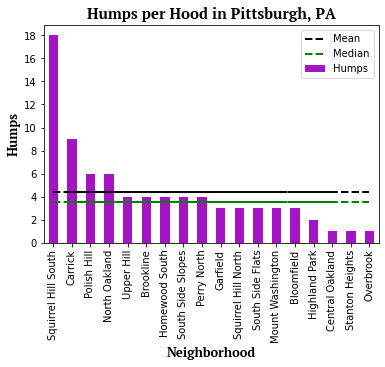

In [5]:
mean = graphHumps["Humps"].mean()
median = graphHumps["Humps"].median()
graphHumps["Mean"] = mean
graphHumps["Median"] = median
graphHumpsSorted = graphHumps.sort_values("Humps", ascending=False)

graphHumpsSorted.plot.bar(color="#A414C4", x="Neighborhood", y="Humps")
graphHumpsSorted["Mean"].plot.line(style="--", lw=2, color="black")
graphHumpsSorted["Median"].plot.line(style="--", rot=90, lw=2, color="green")
plt.legend(["Mean", "Median", "Humps"])
metaGraph()

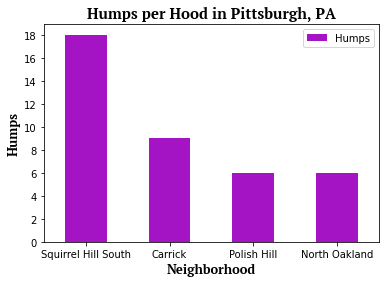

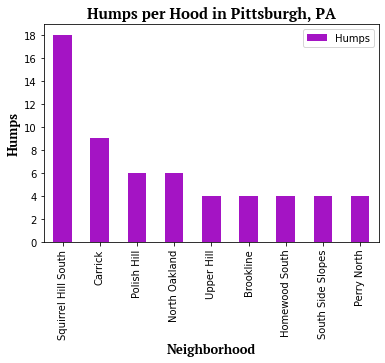

In [6]:
ghwQueryMean = graphHumpsSorted["Humps"] >= mean
ghwQueryMedian = graphHumpsSorted["Humps"] >= median

graphHumpsSorted[ghwQueryMean].plot.bar(color="#A414C4",x="Neighborhood", y="Humps", rot=0)
metaGraph()
graphHumpsSorted[ghwQueryMedian].plot.bar(color="#A414C4",x="Neighborhood", y="Humps")
metaGraph()